## Здравствуйте, меня зовут *Николай Королев*, вот моё Задание №2 по курсу ПСАД-2020!

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from collections import defaultdict
from matplotlib import pyplot as plt
from statsmodels.stats.proportion import proportion_confint

import seaborn as sns
sns.set()

np.random.seed(228)

%matplotlib inline
# %config InlineBackend.figure_format = 'svg' 

### Задача 1  

Задана выборка, включающая значения переменной $X$. 

X sample mean:  5.206


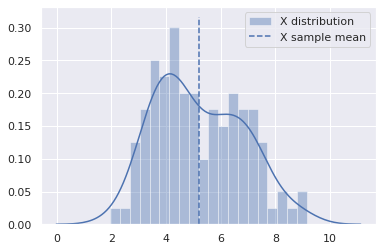

In [2]:
X = pd.read_excel('t1_data.xlsx').values.ravel()

sns.distplot(X, label='X distribution', bins=20)
plt.vlines(X.mean(), *plt.ylim(), linestyles='--', colors='b', label="X sample mean")
plt.legend()
print("X sample mean: ", np.round(X.mean(), 3))
plt.show()

Определите доверительный интервал для математического ожидания на уровне $\alpha$ (для каждого $\alpha$ из списка) c использованием...

In [3]:
alpha_list = np.array([0.1, 0.075, 0.05, 0.025, 0.01]) 

Распределения Стьюдента

In [4]:
def student_mci(data, alpha=0.05):
    sigma = np.std(data, ddof=1)
    inc = sp.stats.t(len(data) - 1).ppf(1 - alpha / 2) * sigma / np.sqrt(len(data))
    mean = np.mean(data)
    return mean - inc, mean + inc

Бутстрэп оценивания

In [5]:
def bootstrap_mci(data, alpha=0.05):
    n_samples = 10000
    mean = data.mean()
    boot = np.random.choice(data, replace=True, size=(n_samples, len(data))).mean(axis=1) - mean
    return mean - np.percentile(boot, (1 - alpha / 2) * 100), mean - np.percentile(boot, alpha / 2 * 100)

Сравните результаты и сделайте выводы.

In [6]:
res = defaultdict(list)
res["alpha"] = alpha_list
res["Student"] = [np.round(student_mci(X, alpha), 3) for alpha in alpha_list]
res["Bootstrap"] = [np.round(bootstrap_mci(X, alpha), 3) for alpha in alpha_list]
res = pd.DataFrame(res)
res

,alpha,Student,Bootstrap
0,0.100,"[4.956, 5.456]","[4.957, 5.449]"
1,0.075,"[4.935, 5.477]","[4.937, 5.475]"
2,0.050,"[4.907, 5.505]","[4.91, 5.488]"
3,0.025,"[4.863, 5.549]","[4.855, 5.543]"
4,0.010,"[4.81, 5.602]","[4.817, 5.597]"


**Выводы:** Результаты полученные при помощи t-теста Стьюдента и Bootstrap'а практически совпадают в силу того, что при Bootstrap'е мы получаем практически нормальное распределение.

### Задача 2

Два предприятия выпускают  изделия одного и того же назначения. Предприятие I выпускает изделия с математическим ожиданием срока службы $T_1$, предприятие II выпускает изделия с математическим ожиданием срока службы $T_2$. Сроки службы изделий обоих предприятий распределены нормально и стандартные отклонения для них равны $\sigma_1$ и $\sigma_2$ соответственно. При этом $T_1 < T_2$, но изделия второго предприятия дороже.

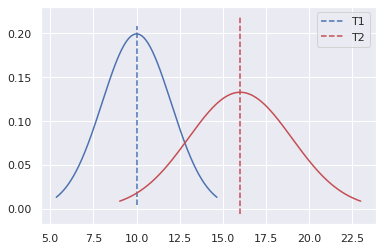

In [7]:
T1, T2, sigma1, sigma2 = 10, 16, 2, 3

def plot_T(T, sigma, c, label):
    norm = sp.stats.norm(loc=T, scale=sigma)
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
    plt.plot(x, norm.pdf(x), c=c)
    plt.vlines(T, *plt.ylim(), linestyles='--', colors=c, label=label)
    
plot_T(T1, sigma1, 'b', 'T1')
plot_T(T2, sigma2, 'r', 'T2')
plt.legend()
plt.show()

Третье предприятие утверждает, что ему удалось разработать технологию производства изделий со средним сроком службы  предприятия II, но по цене предприятия I. В качестве доказательства предлагаются результаты тестирования для $k$ изделий. 

Нулевая гипотеза $H_0$ предполагает, что на самом деле срок службы изделий предприятия III имеет распределение, совпадающее с распределением срока службы изделий предприятия I. Альтернативная гипотеза $H_1$ предполагает, что срок службы изделий предприятия III имеет распределение, совпадающее с распределением срока службы изделий предприятия II. Проверка этих двух предположений производится путем сравнения эмпирически оцененного среднего срока службы протестированных изделий предприятия III с некоторым порогом $T$. Конкретное значение $T$ находится из условия того, что допустимая ошибка первого рода равна $\alpha$. Значение ошибки второго рода обозначим через $\beta = \beta(\alpha, k)$.

Постройте график мощности такого теста в зависимости от $k$ и сделайте выводы.

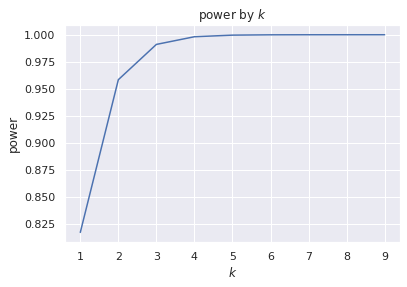

In [8]:
def get_power(u1, s1, u2, s2, alpha=0.05, k=1):
    s1 /= np.sqrt(k)
    s2 /= np.sqrt(k)
    q = sp.stats.norm(u1, s1).ppf(1 - alpha)
    return 1 - sp.stats.norm(u2, s2).cdf(q)

X = np.arange(1, 10)
Y = np.array([get_power(T1, sigma1, T2, sigma2, k=x) for x in X])
plt.plot(X, Y)
plt.title('power by $k$')
plt.xlabel('$k$')
plt.ylabel('power')
plt.show()

**Выводы:** При увеличении размера выборки $k$ мощность статистического критерия растёт, а вероятность ошибки второго рода уменьшается. Достаточно $k = 5$ для проведения теста.

### Задача 3

В 5 серии 13 сезона передачи “Разрушители легенд” проверялась справедливость выражения “know something like the back of one’s hand”. В эксперименте принимало участие 12 испытуемых. Каждому из них были предъявлены 10 фотографий похожих рук разных людей, среди которых они должны были угадать свою.
11 из 12 испытуемых выбрали свою фотографию.
\($H_0$\): испытуемые выбирают фотографии тыльной стороны руки наугад (\($p$=0.1\)).
\($H_1$\): испытуемые выбирают фотографию тыльной стороны своей собственной руки осознанно (\($p>0.1$\)).


Воспользуйтесь точным биномиальным критерием для проверки (H_0) против альтернативы (H_1). Для этого:

	• Постройте нулевое распределение статистики числа успехов в выборке распределения Бернулли с параметром p. Сформируйте выборку сами напрямую из условия задачи.
	• Напишите функцию, которая принимала бы на вход тройку чисел (np,nq,p0), где np – число успехов, nq – число неудач в выборке размера np + nq, p0 – значение параметра p, задающего нулевую гипотезу. Ваша функция должна возвращать значение достигаемого уровня значимости против правосторонней альтернативы.
	• Визуально сравните поведение значения, выдаваемые вашей функцией со стандартным тестом
    scipy.stats.binom_test(·)
	• Отвергается ли гипотеза (H_0) на достигаемом уровне значимости 0.05? p-value?

#### Нулевое распределение

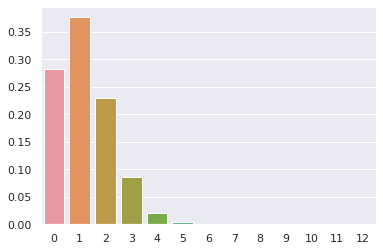

In [9]:
def C(n, k):
    if k < 0 or k > n:
        raise ValueError(f"'k' must be in range [0; {n}]. Actual: {k}")
    if k > n - k:
        k = n - k
    val = 1
    for i in range(k):
        val *= n - i
        val //= i + 1
    return val

def generate_bernoulli(n, p):
    support = np.arange(n + 1)
    probs = np.array([C(n, x) * (p ** x) * ((1 - p) ** (n - x)) for x in support])
    return support, probs

n = 12
p = 0.1
dist = sp.stats.binom(n, p)
support, probs = generate_bernoulli(n, p)
sns.barplot(support, probs)
plt.show()

#### Выборка

In [10]:
def generate_data(n, good):
    data = np.zeros(n, np.int)
    idx = np.random.permutation(n)[:good]
    data[idx] = 1
    return data

good = 11
X = generate_data(n, good)
X

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

#### pvalue

In [11]:
def get_pvalue(good, bad, p0):
    n = good + bad
    support, probs = generate_bernoulli(n, p0)
    mask = support >= good
    return probs[mask].sum()

p0 = 0.1
get_pvalue(sum(X), len(X) - sum(X), p0)

1.0900000000000006e-10

#### Визуальное сравнение

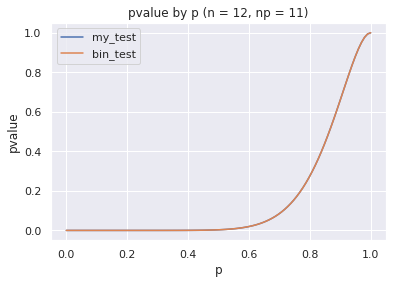

In [12]:
p = np.linspace(0, 1, 100)

bin_test = [sp.stats.binom_test(sum(X), n=len(X), p=x, alternative='greater') for x in p]
my_test = [get_pvalue(sum(X), len(X) - sum(X), x) for x in p]

sns.lineplot(p, my_test, label='my_test')
sns.lineplot(p, bin_test, label='bin_test')
plt.title(f"pvalue by p (n = {n}, np = {sum(X)})")
plt.xlabel("p")
plt.ylabel("pvalue")
plt.legend()
plt.show()

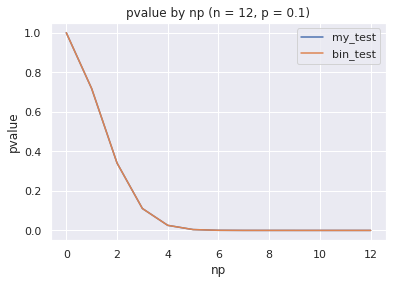

In [13]:
support = np.arange(n + 1)
bin_test = [sp.stats.binom_test(x, n=n, p=p0, alternative='greater') for x in support]
my_test = [get_pvalue(x, n - x, p0) for x in support]

sns.lineplot(support, my_test, label='my_test')
sns.lineplot(support, bin_test, label='bin_test')
plt.title(f"pvalue by np (n = {n}, p = {p0})")
plt.xlabel("np")
plt.ylabel("pvalue")
plt.legend()
plt.show()

Результаты визуального анализа показывают, что результаты функции должны совпадать или по крайней мере быть очень близкими.

#### binom_test для задачи и мой pvalue

In [14]:
sp.stats.binom_test(sum(X), n=len(X), p=p0, alternative='greater')

1.0900000000000006e-10

In [15]:
get_pvalue(sum(X), len(X) - sum(X), p0)

1.0900000000000006e-10

Гипотеза $H_0$ отвергается при уровне значимости 0.05. pvalue = $1.09 \times 10^{-10}$.

**Выводы:** Изначально было понятно, что для вероятности $p=0.1$ получить для 12 испытаний 11 успешных практически невозможно. Статистический тест это подтверждает. Таким образом мы отвергаем гипотезу $H_0$ при уровне значимости 0.05, причём отвергли бы её и при уровне значимости 0.01, и при 0.001, и даже при $10^{-9}$, т.к. pvalue показывает минимальный уровень значимости, при котором мы бы отвергли гипотезу, а pvalue = $1.09 \times 10^{-10}$. Вычисленные  значения pvalue совпадают с полученными из библиотеки `scipy.stats`, что говорит о правильной имплетанции функций.

### Задача 4

24 умственно отсталых ребёнка с СДВГ в течение недели принимали либо метилфенидат, либо плацебо, а в конце недели проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, после недельного курса каждый испытуемые проходили второй тест.
Каков эффект препарата?

In [16]:
adhd = pd.read_csv("ADHD.txt", sep=' ')
adhd.sample(5)

,D0,D60
8,34,45
20,34,35
9,53,42
14,36,35
4,34,38


Чтобы использовать $t$-критерий Стьюдента для связанных выборок, необходимо проверить, нет ли существенных отклонений от нормальности попарных разностей. Для этого воспользуйтесь визуальной проверкой нормальности (функция `qqplot` из `statsmodels`), a также библиотечным тестом проверки нормальности: `scipy.stats.shapiro`

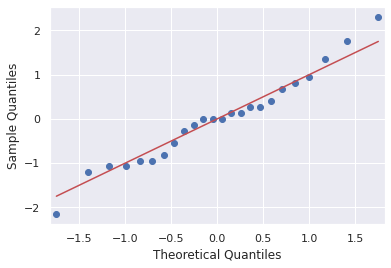

In [17]:
from statsmodels.graphics.gofplots import qqplot

qqplot(adhd['D60'] - adhd['D0'], line='s', fit=True)
plt.show()

In [18]:
sp.stats.shapiro(adhd['D60'] - adhd['D0'])

(0.9798055291175842, 0.8922544717788696)

Примените $t$-критерий Стьюдента `scipy.stats.ttest_rel` для связанных выборок.

In [19]:
sp.stats.ttest_rel(adhd['D0'], adhd['D60'])

Ttest_relResult(statistic=-3.2223624451230406, pvalue=0.003771488176381471)

Если бы у нас не было информации о связях между выборками, пришлось бы применять версию критерия Стьюдента для независимых выборок `scipy.stats.ttest_ind`. Сравните результаты применения критерия Стьюдента к этим данным, если считать выборки связанными и не связанными. В каком из этих случаев уровень достигаемой значимости меньше? Как вы думаете почему?

In [20]:
sp.stats.ttest_ind(adhd['D0'], adhd['D60'])

Ttest_indResult(statistic=-1.452163501815909, pvalue=0.1532433046938409)

**Выводы:** Попарные разности распределены нормально. Применяя $t$-критерий Стьюдента для связанных выборок мы получаем крайне низкий pvalue (в районе $3 \times 10^{-3}$), что говорит о том, что лекарство имеет реальный эффект. Отметим, что в случае использования независимых выборок pvalue намного выше (в районе $15\%$). Это связано с тем, что в случае связанных выборок, мы дополнительно получаем информацию о том, что некоторый ребёнок, который выполнял тест ниже среднего в обоих случаях улучшил свой результат. В случае несвязанных выборок мы воспринимаем два этих результата, как результаты двух различных детей, написавших тест ниже среднего. В такой ситуации могла бы происходить ситуация, что ребёнок, принимавший лекарство, изначально писал его немного лучше, чем ребёнок, не принимавший его, что заставляет нас делать дополнительную поправку в pvalue и быть менее уверенными в том, что лекарство реально работает.

### Задача 5

Задана выборка $Y$ результатов распознавания для некоторой задачи классификации.

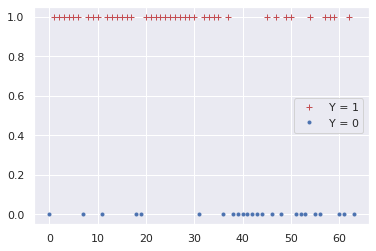

In [21]:
Y = pd.read_excel("t2_data.xlsx").values.ravel()

plt.plot(np.arange(Y.size)[Y == 1], np.count_nonzero(Y == 1) * [1], 'r+', label='Y = 1')
plt.plot(np.arange(Y.size)[Y == 0], np.count_nonzero(Y == 0) * [0], 'b.', label='Y = 0')
plt.legend()
plt.show()

Оцените доверительный интервал для показателя *ACCURACY* с использованием...

Метода Клоппера-Пирсона (с использованием аппроксимации через __бета__ распределение).

    http://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
    alpha confidence intervals for a binomial distribution of k expected successes on n trials

In [22]:
def bin_clopper_pearson(data, alpha=0.05):
    success = sum(data)
    fail = len(data) - success
    p = alpha / 2
    low = sp.stats.beta.ppf(p, success, fail + 1)
    high = sp.stats.beta.ppf(1 - p, success + 1, fail)
    return low, high

А также с помощью __нормальной__ аппроксимации

In [23]:
def bin_normal_approx(data, alpha=0.05):
    p = sum(data) / len(data)
    inc = np.sqrt(p * (1 - p) / len(data)) * sp.stats.norm.ppf(1 - alpha / 2)
    return p - inc, p + inc

Сравните результаты и сделайте выводы.

In [24]:
res = defaultdict(list)
res["alpha"] = alpha_list
res["Clopper-Pearson"] = [np.round(bin_clopper_pearson(Y, alpha), 3) for alpha in alpha_list]
res["Normal"] = [np.round(bin_normal_approx(Y, alpha), 3) for alpha in alpha_list]
res = pd.DataFrame(res)
res

,alpha,Clopper-Pearson,Normal
0,0.100,"[0.515, 0.726]","[0.525, 0.725]"
1,0.075,"[0.506, 0.733]","[0.517, 0.733]"
2,0.050,"[0.495, 0.743]","[0.506, 0.744]"
3,0.025,"[0.478, 0.757]","[0.489, 0.761]"
4,0.010,"[0.457, 0.774]","[0.469, 0.781]"


Также сравните ваши реализованные метод с библиотечными: `statsmodels.stats.proportion.proportion_confint`, в вариантах  `proportion_confint(k, n, alpha, 'beta')` и `proportion_confint(k, n, alpha, 'normal')`

In [25]:
res['Correct-Cl-P'] = [np.round(proportion_confint(sum(Y), len(Y), alpha, 'beta'), 3) for alpha in alpha_list]
res['Correct-Normal'] = [np.round(proportion_confint(sum(Y), len(Y), alpha, 'normal'), 3) for alpha in alpha_list]
res

,alpha,Clopper-Pearson,Normal,Correct-Cl-P,Correct-Normal
0,0.100,"[0.515, 0.726]","[0.525, 0.725]","[0.515, 0.726]","[0.525, 0.725]"
1,0.075,"[0.506, 0.733]","[0.517, 0.733]","[0.506, 0.733]","[0.517, 0.733]"
2,0.050,"[0.495, 0.743]","[0.506, 0.744]","[0.495, 0.743]","[0.506, 0.744]"
3,0.025,"[0.478, 0.757]","[0.489, 0.761]","[0.478, 0.757]","[0.489, 0.761]"
4,0.010,"[0.457, 0.774]","[0.469, 0.781]","[0.457, 0.774]","[0.469, 0.781]"


**Выводы:** Доверительные интервалы, полученные обоими аппроксимациями, примерно одинаковы.